**Anmerkungen zur Bedienung der interaktiven Präsentation**

- Die Vortragspräsentation ist als interaktive [Rise](https://rise.readthedocs.io/en/latest/) Präsentation konzeptioniert.

- Um die interaktive Präsentation zu starten, öffnen Sie bitte folgende URL in ihrem Browser, 
<!-- oder scannen den QR Code -> kann ja das dann nicht bedienen? -->
- Es kann ein wenig dauern, bis die Präsentation gestartet wird. Notfalls laden Sie die Seite bitte neu.
- Die interaktive Präsentation kann wie folgt bedient werden:
    - `Leertaste`: Eine Folie weiter.
    - `Hochstelltaste + Leertaste`: Eine Folie zurück.
    - `Strg + Enter`: Laden eines interaktiven Plots.
    - `Alt + r`: Aktivieren bzw. Deaktivieren der Präsentation.
    - Falls ein interaktive Plot bei Ausführung einer Code Zelle nicht richtig positioniert ist, deaktiviere und aktiviere Sie die Präsentation indem sie zwei Mal `Alt + r` drücken.

<div align="center" style="font-size:60px;">
Probelehrveranstaltung für die Professur für Angewandte Mathematik mit Schwerpunkt Statistical Learning
<br><br>
Stationarität von Zeitreihen mit Anwendung an einem praktischen Beispiel
<br><br>
Dr. Fabian Spanhel
<div/>
    
<div align="left" style="font-size:16px;">
<div/>



- Einführung und Motivation
- Illustration des Zusammenhangs zwischen Zeitreihendaten und -prozess
- Definition und Illustration der Stationarität 
- Praktische Anwendung anhand der Prognose von Inflationsdaten

- Lernziele sind, dass die Studierende den Zusammenhang zwischen Prozess und Daten verstehen 
- Die Definition der schwache Stationariät kennen
- Den AR(1) Prozess kennenlernen und wann er stationär ist
- Eine praktische Anwendung einens stationären AR(1) Prozess sehen

# Einführung und Motivation

Wieso ist der Mietpreis für manche Mieter in diesem Jahr enorm angestiegen?

<div style="display: flex; align-items: center; margin-top: -20px;">
  <div style="flex: 2; padding: 0px;">
     <img src="./figures/inflation.png" alt="Inflationsrate" style="width: 4200px; height: 620px;"/>
  </div>
  <div style="flex: 30; padding: 100px; font-size: 25px;">
    <ol style="margin: 0; padding: 0">
      <li>In einer Indexmiete steigt die Kaltmiete mit der <strong>Inflationsrate</strong>.</li>
      <li>Die <strong>Inflationsrate</strong> ist die prozentuale Veränderung der Verbraucherpreise zum Vorjahresmonat.</li>
      <li>Aufgrund mehrerer Krisen ist die <strong>Inflationsrate</strong> seit 2 Jahren auf den höchsten Stand seit der Wiedervereinigung gestiegen.</li>
    </ol>
  </div>
</div>

# Einführung und Motivation

Wieso ist der Mietpreis für manche Mieter in diesem Jahr enorm angestiegen?

<div style="display: flex; align-items: left;">
  <div style="flex: 1; padding: 50px; font-size: 25px;">
    <ol style="margin: 200; padding: 0">
      <li>In einer Indexmiete steigt die Kaltmiete mit der <strong>Inflationsrate</strong>.</li>
      <li>Die <strong>Inflationsrate</strong> ist die prozentuale Veränderung der Verbraucherpreise zum Vorjahresmonat.</li>
      <li>Aufgrund mehrerer Krisen ist die Inflationsrate seit 2 Jahren auf den höchsten Stand seit der Wiedervereinigung gestiegen.</li>
    </ol>
  </div>
  <div style="flex: 2; padding: 0px;">
     <img src="./inflation.png" alt="Inflationsrate" style="width: 4000px;"/>
  </div>
</div>


- Wer von Ihnen hat einen Indexmietvertrag? 
    Mit einer Indexmiete vereinbaren Mieter und Vermieter bereits im Mietvertrag, dass sich die Kaltmiete erhöht, wenn die Verbraucherpreise steigen. Die Preise ermittelt regelmäßig das Statistische Bundesamt und veröffentlicht sie in dem sogenannten Verbraucherpreisindex (VPI).
- Dann teilen vermutlich ein paar unter Ihnen mein Leid, meine Miete wird sich im nächsten Monat nämlich um 12.2 % erhöhnen.
- Wie konnte es soweit kommen dass die Inflationsrate seit 2 Jahren auf den höchsten Stand seit der Wiedervereinigung gestiegen ist? [Corona und die Wirtschaftskrise] haben dazu geführt, dass die Verbraucherpreise, also die Inflation steigen. Weltweit steigen die Produktionskosten, die Lieferketten sind seit der Corona-Pandemie gestört. Infolge des Krieges in der Ukraine kommt es zu Rohstoffengpässen, die das Angebot verknappen – vor allem bei Energie und Getreide.
    - Die Erzeugerpreise sind extrem stark angestiegen und nach und nach reichen die Produzenten diese Preisanstiege an die Verbraucher weiter. Bisher sind es vor allem die Energiepreise, die sich in den Verbraucherpreisen direkt niedergeschlagen haben. Aber da sollte man sich nicht täuschen lassen.
    - https://zdfheute-stories-scroll.zdf.de/inflation-preise-teuer/index.html
- Grafik Inflation
    - Was bedeutet monatliche Inflation: Die Veränderung des Verbraucherpreisindex zum Vorjahr wird als Inflationsrate bezeichnet

- Wirtschaftsdaten (Börsenkurse, Zinsindizes, Absatzzahlen), Wetterdaten, Unternehmensdaten
Börsenkurse allgemein, Bevölkerungsentwicklung, Preisindex, Wahlabsichtsbefragungen, Wetterdaten, Zinsindex
- "Die Zeitreihenanalyse befasst sich in der Statistik mit der inferenzstatistischen Analyse von Zeitreihen und der Vorhersage von Trends (Trendextrapolation) zu ihrer künftigen Entwicklung"
- Abhängigkeit durch Zeit an Inflation erklären: Das was in 2008 war relativ egal, was in letzter Zeit passiert

**Was ist eine Zeitreihe?**
<br><br>

Im Folgenden, sei $T \in \mathbb{N}$.

Wenn wir von einer (diskreten) Zeitreihe sprechen, können damit zwei verschiedene Begriffe gemeint sein:
<blockquote style="width: auto; background-color: 
                   lightyellow; color: black; 
                   margin: 70px; 
                   padding: 20px; 
                   border: 3px solid #ccc;
                   margin-bottom: 0px;
                   margin-top: 60px
                   ">
<!--
1. Eine Zeitreihe ist eine Abfolge von Daten $(y_t)_{t=1,...,T}$, die in zeitlicher Reihenfolge angeordnet sind.
<br><br>
2. Eine Zeitreihe ist ein stochastischer Prozess $(Y_t)_{t\in \mathbb{Z}}$, d.h., ein Folge von Zufallsvariablen mit einem Index $t$, der für Zeitpunkte steht.
-->
<ol style="margin: 20; padding: 0">
    <li>Eine Zeitreihe ist eine <strong>Abfolge von Daten</strong> $(y_t)_{t=1,...,T}$, die in zeitlicher Reihenfolge angeordnet sind.</li>
    <li>Eine Zeitreihe ist ein <strong>stochastischer Prozess</strong> $(Y_t)_{t\in \mathbb{Z}}$, d.h., ein Folge von Zufallsvariablen mit einem Index $t$, der für Zeitpunkte steht.</li>
</ol>
</blockquote>



**Die Verbindung zwischen 1. und 2. ergibt sich dadurch, dass Daten $(y_t)_{t=1,...,T}$ in 1. als eine Stichprobe eines zugrunde liegenden stochastischen Prozesses $(Y_t)_{t\in \mathbb{Z}}$ in 2. aufgefasst werden.**

**Illustration des Zusammenhangs zwischen Zeitreihendaten und -prozess**

- Wichtig dass zu verstehen, in meiner Erfahrung war das unklar für manche Studierende oder sogar Doktoranden, dann ist auch alles leichter

interactive(children=(ToggleButtons(button_style='info', description=' ', options=('Daten', 'Zufallsvariablen'…

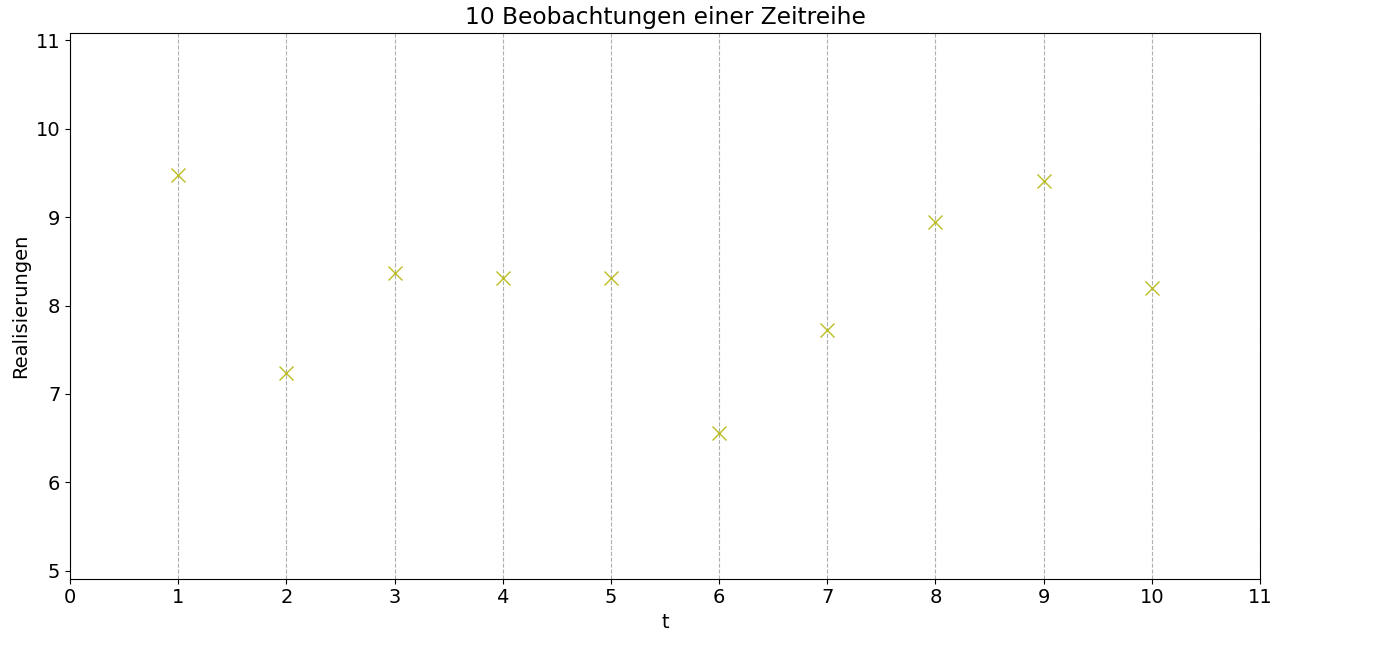

In [15]:
%matplotlib ipympl
from plv.plot import data_vs_process
data_vs_process(figsize=(14, 6.5))

## Annahmen an einen Zeitreihenprozess für die statistische Inferenz und Modellierung
[TODO] Diese Folie weg oder woanders
Für die statistische Inferenz mit Zeitreihen müssen Annahmen getroffen werden, da in der Praxis meist nur eine Realisierung des die Zeitreihe generierenden Prozesses vorliegt. Die Annahme der Ergodizität bedeutet, dass Stichprobenmomente, die aus einer endlichen Zeitreihe gewonnen werden, für 
�
→
∞T\rightarrow \infty  quasi gegen die Momente der Grundgesamtheit konvergieren.

- In der Praxis ist es häufig der Fall, dass Daten zu aufeinanderfolgenden Zeitpunkten mit gleichmäßigen Abstand erhoben werden.
- Diese Daten bezeichnen man als **Zeitreihe**.
- Anders als in Querschnittstudien, gibt es durch die Zeit eine natürlich Reihenfolge der Beobachtungen.
- Dies führt in der Regel dazu, dass Beobachtungen, die zeitlich nahe beieinander liegen, enger miteinander verbunden sind als Beobachtungen, die weiter auseinander liegen.
- **Die Zeitreihenanalyse** befasst sich primär mit der Vorhersage von Zeitreihen.

Die Punkte oben evtl. bei DataVsProcess einfügen (?)

# Stationarität

<br>

- Für die statistische Analyse und Modellierung von Zeitreihen müssen Annahmen getroffen werden, da in der Praxis meist nur eine Realisierung des datengenerierenden Prozesses vorliegt.

<!--
- Neben Ergodizität ist Stationarität eine bedeutende Eigenschaft eines stochastischen Prozesses.
-->
<!-- - Es gibt zwei Definition von Stationarität, die Klasse der stochastischen Prozess einschränken.
-->
- Wir konzentieren uns hier auf die sogenannte **schwache Stationarität**.

<blockquote style="width: auto; background-color: 
                   lightyellow; color: black; 
                   margin: 70px; 
                   padding: 20px; 
                   border: 3px solid #ccc;
                   margin-bottom: 0px;
                   margin-top: 10px
                   ">
Definition: (<strong>Schwache Stationarität</strong>)<br>
Ein stochastischer Prozess $(Y_t)_{t\in \mathbb{Z}}$ ist schwach stationär $:\!\!\iff$
<br><br>
1. $E[Y_t] = \mu \in \mathbb{R}$ <br>
2. $Cov[Y_t, Y_{t-h}] = \gamma(h) \in \mathbb{R}$
<br><br>
für alle $t, h \in \mathbb{Z}$.
</blockquote>

> **DEFINITION:** (Schwache Stationarität) <br>
> Ein stochastischer Prozess $(Y_t)_{t\in \mathbb{T}}$ ist schwach stationär $:\!\!\iff$
>
> 1. $E[Y_t] = \mu \in \mathbb{R}$ <br>
> 2. $Cov[Y_t, Y_{t-h}] = \gamma(h) \in \mathbb{R}$
>
> für alle $\forall t \in \mathbb{T}$ und $\forall h \in \mathbb{T}$.

<!--
## (Strikte Stationarität) und Kovarianzstationarität 
Frage hier an die Studierenden: Welche Definition ist stärker?
Evtl. hier auch wieder Grafik mit 4 Punkten und daran sichtbar machen (auf ZVs Ebene)
    Mittelwert der Trajektorien sollte gleich sein
-->

**Erste Beispiele für (schwach) stationäre Prozesse**

1. Sei $(Y_t)_{t\in \mathbb{T}}$ eine Folge von i.i.d. Zufallsvariablen.
2. Sei $(Y_t)_{t\in \mathbb{T}}$ Weißes Rauschen, d.h., $E[Y_t] = 0$ für alle $t \in \mathbb{Z}$ und $Cov[Y_t, Y_h]=\sigma_U^2$ für $t=h$ und sonst $Cov[U_t, U_h]=0$ alle $t, h \in \mathbb{Z}$.
3. Sei $(Y_t)_{t\in \mathbb{T}}$ definiert durch $Y_t = bU_{t-1} + U_t$, wobei $(U_t)_{t\in \mathbb{T}}$ Weißes Rauschen ist.


- Die Annahme der Ergodizität bedeutet, z.B. dass das arithmetische Mittel einer Trajektorie über die Zeit gegen den selben Wert konvergiert wie das arithemtische Mittel von mehreren Realisierung eines Zeitpunktes, also  gegen den Erwartungswert der Zufallsvariable zu einem Zeitpunkt konvergiert.
- Bei beiden Typen von Prozessen besitzen die endlichdimensionalen Verteilungen des Prozesses bestimmte zeitunabhängige Eigenschaften. Diese beziehen sich bei der Stationarität im engeren Sinn auf die gesamte Verteilungsgestalt und bei der Stationarität im weiteren Sinn nur auf die ersten beiden Momente der endlichdimensionalen Verteilungen.
- Frage an die Studierende: Beispiele für Prozesse die schwach stationär oder nicht-stationär sind?
    - Eher nicht stationäre Beispiele: Temperatur (da Jahreszeiten, also saisonale Schwankungen), Körpergröße eines Menschens über die Jahre. Gemütszustand. Evaluation der PLV.

Evtl. Beispiel für Zeitreihenprozesse, sind die stationär? Darüber abstimmen, mit ja/nein/weiß nicht/kommt drauf an (Es reicht wenn sie die Erwartungs- und Varianzstationarität überprüfen)
1. iid Exponential
1. Summe zweier schwach stationärer Prozesse die voneinander unabhängig sind
1. Weißes Rauschen.
2. MA(1)
3. AR(1)

Laut Andi auch Plots zeigen von nicht stationären Prozessen

Weißes Rauschen einführen

**Der einfachste (schwach) stationäre Prozess**
<br><br>

<blockquote style="width: auto; background-color: 
                   lightyellow; color: black; 
                   margin: 70px; 
                   padding: 20px; 
                   border: 3px solid #ccc
                   ">
Definition: (<strong>Weißes Rauschen</strong>)<br>
$(U_t)_{t\in \mathbb{Z}}$ ist Weißes Rauschen $:\!\!\iff$ Für alle $t, h \in \mathbb{Z}$, mit $t\neq h$ gilt:
<br>

1. $E[U_t] = 0$
2. $Var[U_t] = \sigma^2_U \in \mathbb{R}$
3. $Cov[U_t, U_h] = 0$
</blockquote>

**Die Klasse der (linearen) AR(1) Prozesse**
<blockquote style="width: auto; background-color: 
                   lightyellow; color: black; 
                   margin: 70px; 
                   padding: 20px; 
                   border: 3px solid #ccc;
                   margin-bottom: 0px;
                   margin-top: 50px
                   ">
Definition: (<strong>Autoregressiver Prozess der Ordnung 1</strong>)<br>
$(Y_t)_{t\in \mathbb{Z}}$ ist ein autoregressiver Prozess der Ordnung 1  $:\!\!\iff$<br> Für alle ${t\in \mathbb{Z}}$ gilt

$
\begin{align}
Y_t &= c + aY_{t-1} + U_{t}
\end{align}
$

wobei $(U_t)_{t\in \mathbb{Z}}$ Weißes Rauschen ist.
</blockquote>

- Wir bezeichnen diese Prozesse auch kurz als AR(1) Prozesse.

- Die Zufallsvariable $Y_t$ ist also linear abhängig von der Zufallsvariable $Y_{t-1}$ davor und einem Zufallsfehler $U_t$.
- Frage: Ist $(Y_t)_{t\in \mathbb{Z}}$ (schwach) stationär?

## Illustration anhand der Simulation eines (linearen) AR(1) Prozesses

1. Modellgleichung
    1. Autoregressive weil auf sich selbst regressiert, der Ordnung 1 weil ein Lag
    1. Was bedeutet das? Was ist a?
    1. Was ist wenn a negativ ist? Interessant weil ich sehr gut schätzen kann (Bild mit Normalverteilung)
1. Simulationsbilder in Abhängigkeit von a
    1. Simulation nicht stationär weil wir immer mit gleichen Wert starten, aber schauen wir mal was passiert
<!--
1.	Theoretischen Beweis skizzieren (schon sophisticated, bei Copulas einfacher)
    1. Nur mean stationarität zeigen
    1.	Beweis für Kovarianzstationarität analog (Kovarianz auch nur Erwartungswert), oder E[Y_tY_{t-h}^k], k = 0, 1
    1.	Beweis für strikt stationär schwierig, aber auch |a| <=1
        1.	Stärkere Annahmen and die Abhängigkeit der Störterme
        2.	Keine geschlossene Form für die Multivariate Verteilung im allgemeinen (nur durch Simulationen möglich)
-->

**Simulation von Realisierungen eines AR(1) Prozesses**
- Um diese Frage zu untersuchen, ist es hilfreich Realisierungen des Prozesses zu generieren.

- Wie können wir $T$ Realisierungen eines AR(1) Prozess $Y_t = c + a Y_{t-1} + U_t$ generieren?

```python
import numpy as np

T = 10
(c, a) = (0, 0.5)

u = np.random.normal(size=T)
y = np.zeros(T)
for t in range(1, T):
    y[t] = c + a * y[t-1] + u[t] 
    
print(y)
```

In [8]:
import numpy as np

T = 10
(c, a) = (0, 0.5)
u = np.random.normal(size=T)
y = np.zeros(T)

for t in range(T):
    y[t] = c + a * y[t-1] + u[t]
    
print(y)

[-0.21647733  1.25063255 -0.14965477 -0.67200206 -1.84943295 -0.30874462
 -1.17842106 -0.14923178 -0.36843436  1.19818318]


Simulation von Realisierungen eines AR(1) Prozesses

interactive(children=(FloatSlider(value=0.0, description='a', max=1.1, min=-1.1), IntSlider(value=100, descrip…

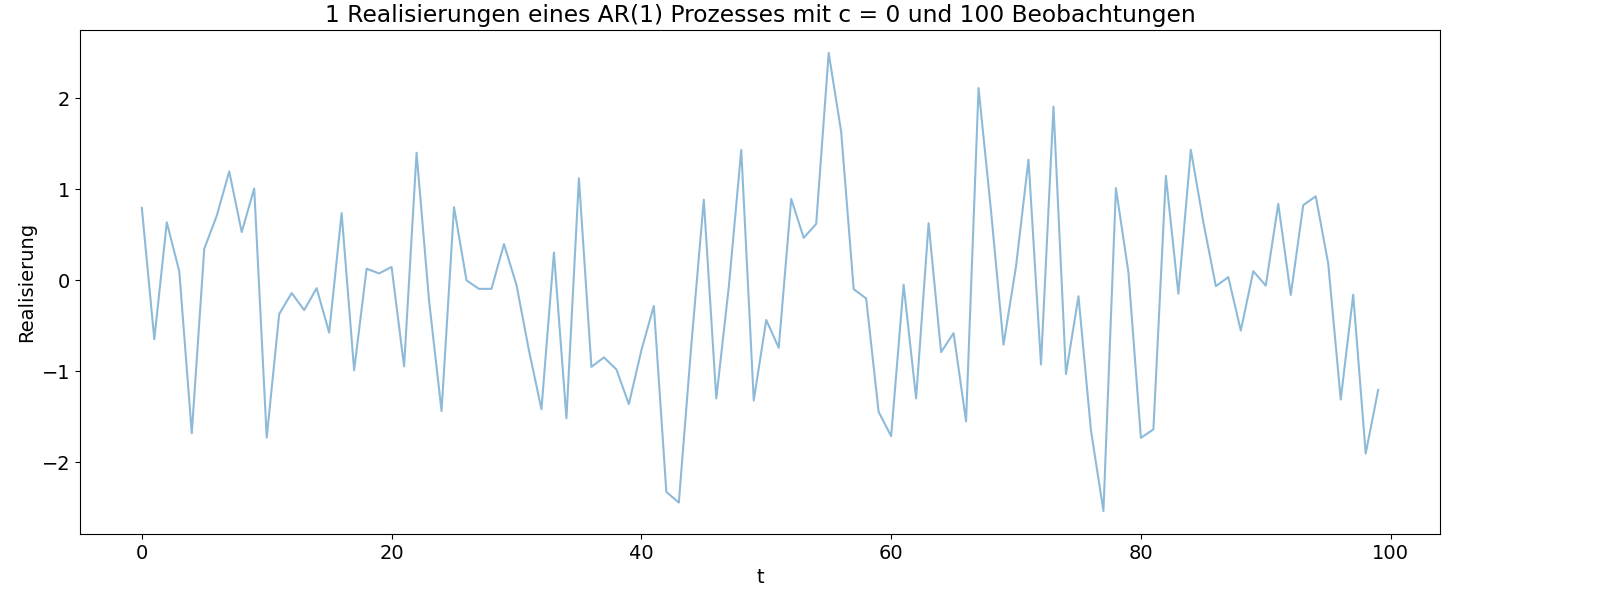

In [23]:
%matplotlib ipympl
from plv.plot import sim_ar
sim_ar(figsize=(16, 6))

- Mit n = 100 und r = 1 anfangen
- zeige a = 0, a = -1, a = 1
- Dann fragen, wie könnte ich Stationarität analysieren?

Simulation von Realisierungen eines AR(1) Prozesses: Analyse der Stationarität

interactive(children=(FloatSlider(value=0.0, description='a', max=1.1, min=-1.1), IntSlider(value=100, descrip…

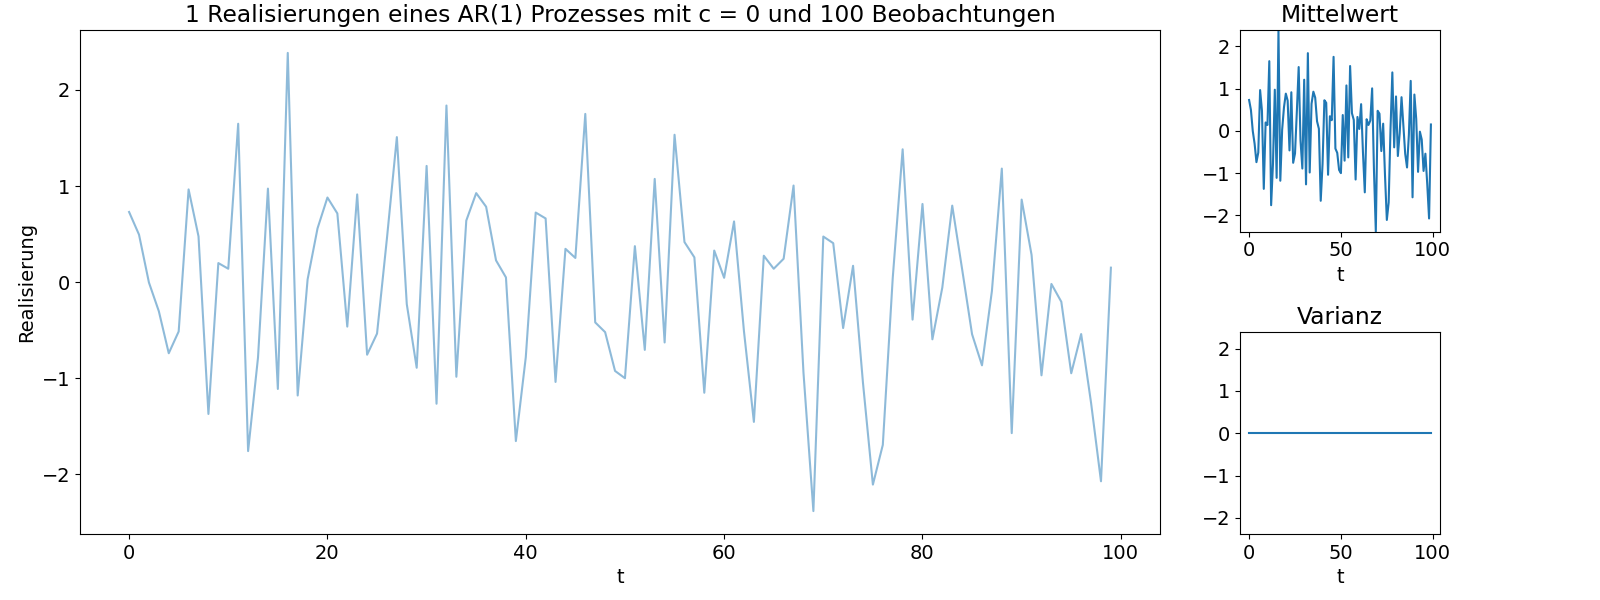

In [24]:
%matplotlib ipympl
sim_ar(figsize=(16, 6), plot_mean_var=True)

- r auf 1001 setzen, T so lassen
- a erhöhen bis zu a=0.99, sieht so aus als würde die Varianz ansteigen -> jetzt T auf 1001 setzen
- a = 1
- a = 1.1

## Skizze des Beweis für die schwache Stationarität des AR(1) Prozesses

**Skizze des Beweis für die schwache Stationarität des AR(1) Prozesses**
<blockquote style="width: auto; background-color: 
                   lightyellow; color: black; 
                   margin: 70px; 
                   padding: 5px; 
                   border: 3px solid #ccc;
                   margin-bottom: -0px;
                   margin-top: 70px
                   ">
Theorem: (<strong>Hinreichende Bedingungen für die Stationarität eines AR(1) Prozesses</strong>)<br>
Sei $Y_t = aY_{t-1} + U_t$, wobei $(U_t)_{t \in \mathbb{Z}}$ Weißes Rauschen ist und $\sup_{t \in \mathbb{Z}} E[Y_t^2] < \infty$. <br><br>
Falls $|a| < 1$,  dann ist $(Y_t)_{t \in \mathbb{Z}}$ schwach stationär.
</blockquote>

- Der Beweis dieses Theorems erfordert Kenntnisse der Maß- und Integrationstheorie.

- Im Folgenden wird der Beweis nur skizziert.

**Beweisidee: Limes Repräsentation von $Y_t$ als eine Funktion von $(U_t)_{t \in \mathbb{Z}}$**

- Rekursive Substituierung führt zu

    $
    \begin{align}
    Y_t & = aY_{t-1} + U_t = a(aY_{t-2} + U_{t-1}) + U_t = \ldots = a^h Y_{t-h} + \sum_{i=0}^{h-1}a^{i}U_{t-i} =: X_h
    \end{align}
    $

- Was passiert mit $X_h$, wenn $h\to\infty$? 
<!-- &#9888;&#65039; $X_h$ ist eine Zufallsvariable. -->

- Man kann zeigen, dass $\exists X \in L^2\colon X_h \stackrel{2}{\to} X$ falls die Annahmen des Theorems erfüllt sind und unter ihrer wiederholte Anwendung folgern, dass 

    $
    \begin{align*}
    E[Y_t] & = 0
    \\
    Cov[Y_t, Y_{t-h}] 
    & = a^h\frac{\sigma_U^2}{1-a^2} \in \mathbb{R}
    \end{align*}
    $

<!--
$
\begin{align*}
E[Y_t] &= 0, \quad
Cov[Y_t, Y_{t-h}] = a^h\frac{\sigma_U^2}{1-a^2} \in \mathbb{R}
\end{align*}
$
-->

<!--
$
\begin{align*}
E[Y_t] & = 0
\\
Cov[Y_t, Y_{t-h}] 
& = a^h\frac{\sigma_U^2}{1-a^2}
\end{align*}
$
Somit ist $E[Y_t]=0$ und $\gamma(t, h) \in \mathbb{R}$ hängt nicht von $t$ ab. Folglich ist $(Y_t)_{t \in \mathbb{Z}}$ stationär. &#11035;
-->

# Praktische Anwendung: Modellierung und Prognose der Inflationsrate

<br>

- Im Folgenden schätzen wir AR(1) Prozesse mittels des Kleinsten Quadrate Schätzers für mehrere "in-sample" Zeiträume.

- Ein "in-sample" Zeitraum der Länge $T$ beinhaltet die Daten, die für die Schätzung benutzt werden,
    und geht von Stichprobenanfang bis zu einem gewissen Monat. 
- Die "out-of-sample" Daten sind dann die Daten nach diesem Monat.
- Für diese "out-of-sample" Daten machen wir ab dem Zeitpunkt $T$ eine **Mehrschrittprognose** $\text{Pred}_T[Y_{T+h}], h\geq 1$, die rekursiv gegeben ist durch

$$\text{Pred}_T[Y_{T+h}] = a\text{Pred}_T[Y_{T+h-1}]$$

Wir betrachen ohne Corona
- Am 31. Dezember 2019 wurde der Ausbruch einer neuen Lungenentzündung mit noch unbekannter Ursache in Wuhan in China bestätigt.[5] Am 30. Januar 2020 rief die Weltgesundheitsorganisation (WHO) angesichts der Ausbreitung und schnellen Zunahme der Infektionen mit dem Coronavirus 2019-nCoV eine internationale Gesundheitsnotlage au
- Es gibt mehrere Möglichkeiten wie man schätzt, wie benutzen KQ
Custom deterministic terms (deterministic)

Accepts a DeterministicProcess

Exogenous variables (exog)

A DataFrame or array of exogenous variables to include in the model


## Ohne Dummy

- Keine Kreuzvalidierung nötig, da least-squares benutzt wird, man könnten den autoregressiven Parameter natürlich penalisieren und dann tunen
- Fitten bis 2018, dann Prognose
- fitten bis 2020 (vor Corona und Wirtschaftskrise), dann Prognose
- Diskussion: Ist da ein Strukturbruch passiert? Stationarität verletzt? Es ist möglich, wenn auch eher unwahrscheinlich, dass die Zeitreihen so ansteigt (mit Simulation rausfinden wie wahrscheinlich das ist, dass so ein Trend mindestens beobachtet wird)
- Rein datenbasiert das schwer zu beantworten. Eher Expertenwissen oder komplexere Modell wo externe Faktoren eine Rolle spielen (Konsumausgaben, Wirtschaftliche Entwicklung, was treibt die Inflation)

**Modellierung der Inflationsrate mit einem AR(1) Prozess**

interactive(children=(IntSlider(value=2008, description='Jahr', max=2024, min=2008), IntSlider(value=1, descri…

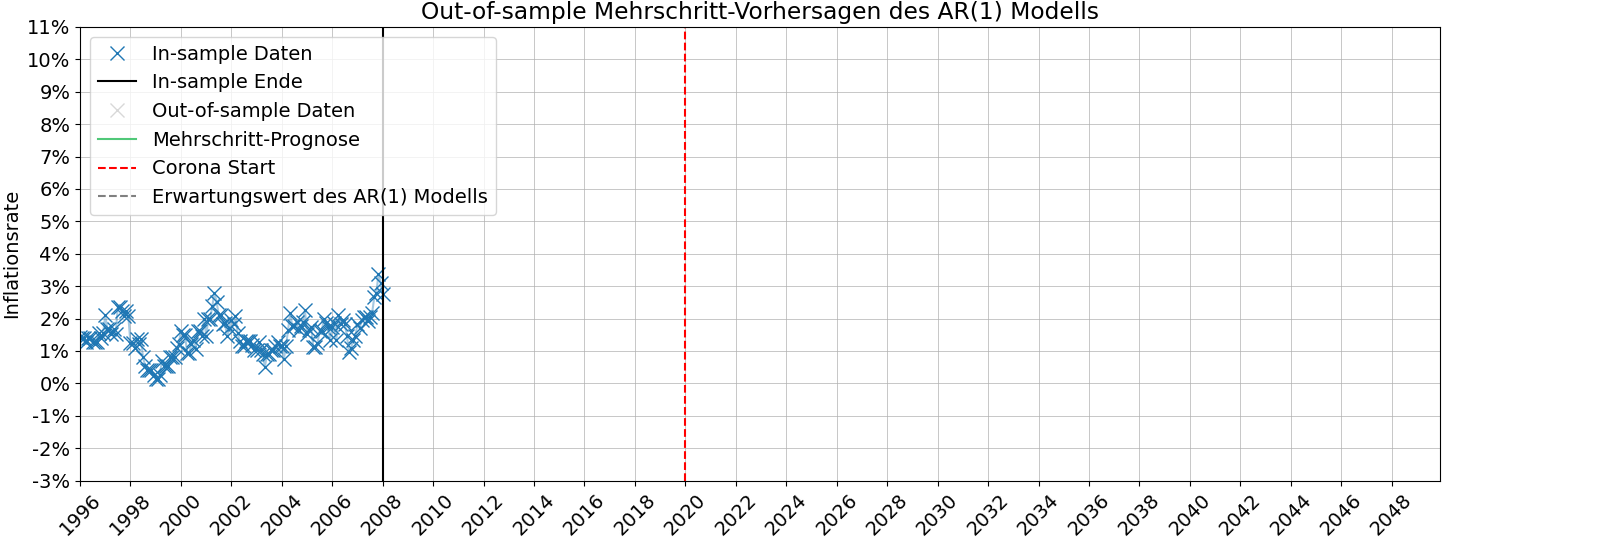

In [20]:
%matplotlib ipympl
from plv.plot import forecast_inflation
forecast_inflation(figsize=(16, 5.4))

**Beobachtungen:**
- Die Annahme der schwachen Stationarität ist ab der Corona Krise fraglich.
- Auch wenn der geschätzte autoregressive Parameter $a$ des AR(1) Prozesses kleiner als 1 ist, wenn man bis zum aktuellsten Monat schätzt, so ist die langfristige Prognose eventuell zu hoch.

**Frage:**

Wie können wir unsere Modellierung verändern, falls die Ereignisse im Zeitraum Krise = [Januar 2020, Feburar 2023] eine Ausnahme darstellen und diese die langfristige Prognose der Inflation nicht beeinflussen sollten?

**Idee:**

Definiere die Krisen Dummy $D_t$, so dass $D_t = 1$ wenn $t \in \text{Krise}$ und 0 sonst, und schätze
$\begin{align}Y_t = c + aY_{t-1} + \delta D_t + U_t\end{align}$.

## Mit Dummy

2019 und 2020 lag die monatliche Inflationsrate in Deutschland zunächst meist zwischen 1 und 2 Prozent, in der zweiten Jahreshälfte 2020 sank sie vorübergehend leicht in den negativen Bereich. In dieser Zeit war die deutsche Mehrwertsteuer aufgrund der Corona-Krise sechs Monate lang abgesenkt worden.

**Modellierung der Inflationsrate mit einem AR(1) Prozess mit Dummy**

interactive(children=(IntSlider(value=2019, description='Jahr', max=2024, min=2008), IntSlider(value=12, descr…

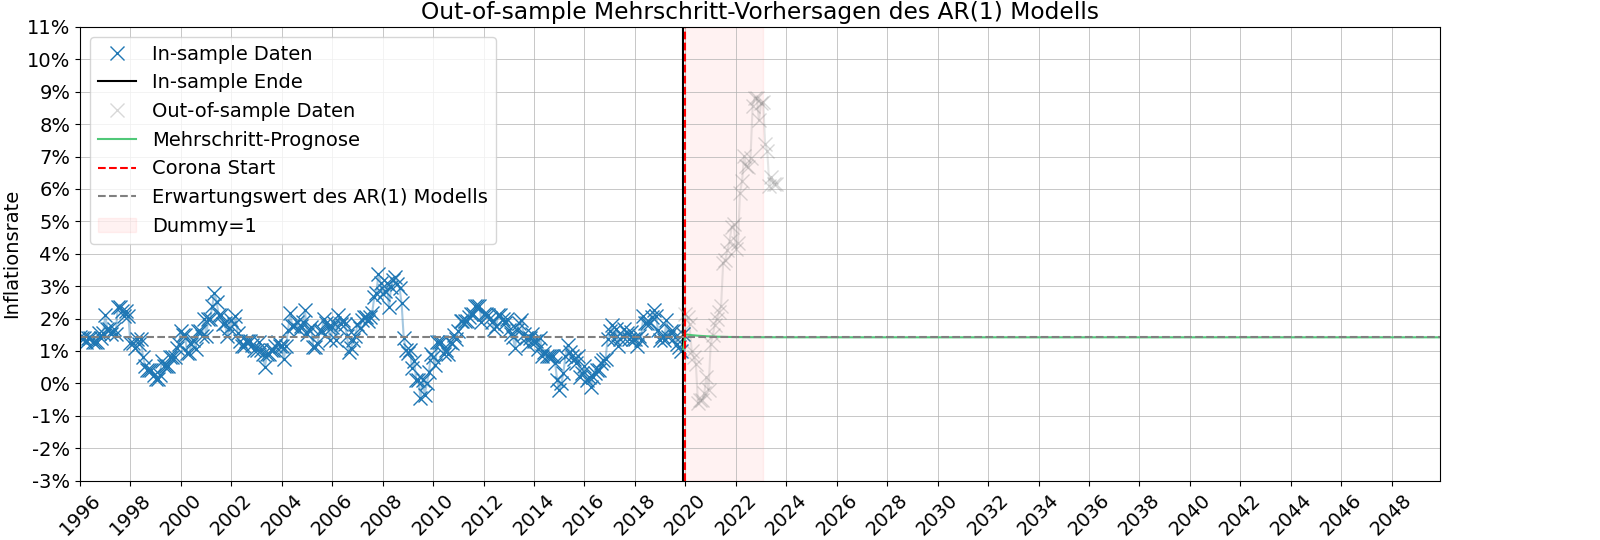

In [21]:
%matplotlib ipympl
forecast_inflation(dummy=True, figsize=(16, 5.4))

In [ ]:
# Je näher an nicht-stationär desto volatiler wird die Schätzung für den Mittelwert aus dem AR(1) Modell
# Siehe inflation.loc["2020-01-01":"2021-06"] -> inflation.loc["2020-01-01":"2021-07"]

# Zusammenfassung
<br>

- Wir haben den Zusammenhang zwischen einem Zeitreihenprozess und -daten illustriert.

- Wir haben die Definition der (schwache) Stationariät kennen gelernt.
- Wir haben den (linearen) AR(1) Prozess kennenlernen und untersucht wann er stationär ist.
- Durch eine praktische Anwendung des AR(1) Prozess anhand der Modellierung der Inflationsrate haben wir das Konzept der Stationarität weiter vertieft und kritisch hinterfragt.


# Literatur

Hamilton, James D. Time Series Analysis. Princeton University Press, 1994. https://doi.org/10.2307/j.ctv14jx6sm.

Lütkepohl, Helmut. New Introduction to Multiple Time Series Analysis. Springer, 2005. https://doi.org/10.1007/978-3-540-27752-1